In [5]:
from cadCAD.configuration import Experiment
from cadCAD.configuration.utils import config_sim
from cadCAD.configuration import Configuration
from cadCAD.engine import ExecutionMode, ExecutionContext, Executor
import pandas as pd
import numpy as np

In [6]:
MONTE_CARLO_RUNS = 3
SIMULATION_TIMESTEPS = 100

sys_params = {
    'parameter': [1]
}

genesis_states = {
    'something': 0
}

def s_something(params, 
                substep, 
                state_history, 
                prev_state, 
                policy_input):
    new_value = np.random.randn()
    return ('something', new_value)


partial_state_update_blocks = [
    {
        'policies': {
            
        },
        'variables': {
            'something': s_something
        }
    }
]

sim_config = {
    'N': MONTE_CARLO_RUNS,
    'T': range(SIMULATION_TIMESTEPS),
    'M': sys_params
}

In [7]:
sim_params = config_sim(sim_config)

exp = Experiment()
exp.append_configs(
    sim_configs=sim_params,
    initial_state=genesis_states,
    partial_state_update_blocks=partial_state_update_blocks
)

exec_mode = ExecutionMode()
local_mode_ctx = ExecutionContext(context=exec_mode.local_mode)

simulation = Executor(exec_context=local_mode_ctx,
                      configs=exp.configs)
raw_system_events, tensor_field, sessions = simulation.execute()



                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.4.28
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 100, 1, 3, 1)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (100, 1, 3, 1)
Execution Method: local_simulations
Execution Mode: parallelized
Total execution time: 0.09s


<Axes: xlabel='timestep'>

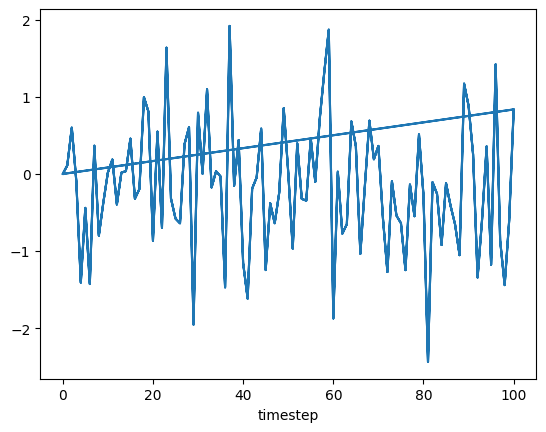

In [8]:
df = pd.DataFrame(raw_system_events)
df.set_index('timestep')['something'].plot()
